# Speech Emotion Recognition with Support Vector Machine (SVM)

Welcome to this notebook! Here, we train and evaluate a Support Vector Machine (SVM) classifier for speech emotion recognition using three CSV files:

- **train_final.csv**: for training
- **val_final.csv**: for initial validation
- **test_final.csv**: for final evaluation

We’ll go through the following sections:
1. Data Loading & Exploration  
2. Data Preprocessing  
3. Baseline SVM Model  
4. Hyperparameter Tuning  
5. Final Evaluation on Test Data  
6. Conclusion and Future Steps


## 1. Data Loading & Exploration

In this section, we load our datasets into Pandas.

In [1]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('../data/features/train_final.csv')
val_df = pd.read_csv('../data/features/val_final.csv')
test_df = pd.read_csv('../data/features/test_final.csv')

# Combine train_df & val_df into one dataframe as we do not need the validation set for our training
full_train_df = pd.concat([train_df, val_df], axis=0, ignore_index=True)

print("Combined shape:", full_train_df.shape)
print(full_train_df['Emotion'].value_counts())

Combined shape: (52905, 52)
Emotion
Neutral     12500
Happy       10707
Question     6452
Bored        6222
Anger        5050
Sad          4727
Surprise     4126
Fear         1605
Disgust      1516
Name: count, dtype: int64


In [2]:
full_train_df

,Filepath,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC56,PC60,PC61,PC65,PC77,PC81,PC89,PC96,PC129,Emotion
0,./dataset/crema-d\AudioWAV\1049_ITS_HAP_XX.wav,-0.688695,-0.468096,0.269248,1.052901,-0.004237,0.143403,-0.045747,-0.148285,-0.189638,...,0.919602,-0.720861,-0.071090,-1.576363,0.874810,-0.446592,-0.386264,-1.071036,0.456687,Happy
1,./dataset/meld\train\dia259_utt0.mp4,-0.843053,-0.659363,-1.052146,0.195356,-0.457859,1.267063,1.302585,1.235284,-0.468899,...,1.365837,0.986414,0.322316,0.673972,-0.309580,-0.685108,-0.833938,1.467013,1.767669,Fear
2,./dataset/mlend\MLEndSND_Public\18603.wav,4.250202,0.150289,1.417960,1.485294,-1.927670,1.516723,2.315556,-1.032795,0.973355,...,0.719700,2.445448,-0.091854,-1.962226,2.948427,0.859881,0.137710,-1.705522,-0.059026,Happy
3,./dataset/mlend\MLEndSND_Public\09082.wav,0.685814,0.122821,-0.301217,-2.129134,1.115084,0.421946,-0.330365,0.344847,-0.790081,...,0.173613,-1.112656,1.089797,0.314386,0.245504,1.118529,0.052763,-0.072107,-2.246616,Bored
4,./dataset/mlend\MLEndSND_Public\29155.wav,0.487355,0.455662,-2.889107,-0.266165,1.506049,1.256227,0.010370,0.402961,-0.612177,...,-0.559539,1.439004,-0.547842,1.908361,0.947363,-0.614633,0.782046,-0.023401,1.148383,Question
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52900,./dataset/esd\0020\Happy\0020_001016.wav,-0.487189,-0.344237,-0.472818,-0.427524,-0.165822,-0.430534,-0.163765,-0.021398,0.331682,...,-0.093387,-1.516680,0.655516,0.016357,1.472470,0.286340,-0.340291,0.776877,-1.319674,Happy
52901,./dataset/esd\0012\Neutral\0012_000102.wav,0.013944,-1.270305,-0.481756,-0.182030,-0.447240,-0.359324,-0.177877,-1.007185,-0.165703,...,-0.693041,-1.296831,0.057770,1.235350,-0.176629,0.655948,-0.704409,-0.415251,0.616312,Neutral
52902,./dataset/esd\0011\Sad\0011_001137.wav,-0.012553,-0.743462,-0.706324,1.169155,0.143569,-0.576614,-1.147296,-1.334122,0.307902,...,-0.517005,-0.055614,-0.264473,-0.583544,-0.414354,0.109568,0.786527,0.232353,-0.442187,Sad
52903,./dataset/esd\0017\Surprise\0017_001418.wav,0.054972,-1.929574,-0.105486,-0.165412,-0.744544,0.360426,1.056346,0.572753,-1.364746,...,-0.986765,-0.354266,-0.089270,0.267617,0.398155,-0.163458,0.420206,-1.994074,-0.222553,Surprise


In [3]:
# Count per emotion in train set
train_counts = full_train_df['Emotion'].value_counts()
print("Train set emotion counts:")
print(train_counts)

# And as percentages:
print("\nTrain set emotion distribution (%):")
print(full_train_df['Emotion'].value_counts(normalize=True) * 100)

Train set emotion counts:
Emotion
Neutral     12500
Happy       10707
Question     6452
Bored        6222
Anger        5050
Sad          4727
Surprise     4126
Fear         1605
Disgust      1516
Name: count, dtype: int64

Train set emotion distribution (%):
Emotion
Neutral     23.627256
Happy       20.238163
Question    12.195445
Bored       11.760703
Anger        9.545412
Sad          8.934883
Surprise     7.798885
Fear         3.033740
Disgust      2.865514
Name: proportion, dtype: float64


In [4]:
test_df

,Filepath,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC56,PC60,PC61,PC65,PC77,PC81,PC89,PC96,PC129,Emotion
0,./dataset/mlend\MLEndSND_Public\35524.wav,-0.355603,1.839700,-1.010580,-0.642144,1.872823,1.606124,0.257271,0.768187,-0.471777,...,2.165339,1.675304,0.393187,-2.803042,1.953065,-3.314251,-1.540539,-1.563391,0.288740,Happy
1,./dataset/mlend\MLEndSND_Public\19138.wav,0.982999,0.286580,-0.551772,-1.465699,1.276304,0.706608,0.696085,0.119953,-0.235249,...,-0.529878,-0.405494,0.329518,-0.211845,-2.195758,0.150805,0.097344,-0.845750,0.351956,Bored
2,./dataset/tess\OAF_angry\OAF_life_angry.wav,0.128368,-1.837013,0.904711,-0.698014,-0.609696,-0.937672,0.038201,0.865891,1.153536,...,1.015289,1.703042,-0.928051,0.810700,-1.874585,-2.290022,0.553491,0.848980,2.229207,Anger
3,./dataset/mlend\MLEndSND_Public\36379.wav,1.762601,1.166828,-0.422945,-0.454047,1.325158,2.540040,-1.328831,-0.306724,-0.108075,...,0.235735,-0.128944,0.303144,1.681745,-0.623315,-0.529795,-0.136059,0.336469,1.217378,Neutral
4,./dataset/crema-d\AudioWAV\1027_TSI_HAP_XX.wav,-0.827926,0.286389,-0.061405,0.096485,0.353658,-0.286968,0.285229,-0.936931,0.189247,...,1.010240,-0.266920,-0.090042,0.166288,0.499254,0.176064,0.307290,-0.322346,-0.835320,Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9327,./dataset/esd\0019\Sad\0019_001185.wav,0.182478,-0.911399,-0.330807,0.538830,-0.222243,-0.197703,-1.274072,-0.975860,-0.260023,...,0.113082,-1.236989,-1.631040,0.663207,-0.408491,-0.372053,-0.057605,0.645343,0.509238,Sad
9328,./dataset/esd\0020\Surprise\0020_001496.wav,0.322395,-0.903910,0.241991,0.734619,-0.596855,0.893191,-1.820630,-0.651882,-1.167586,...,-0.319956,-0.542873,-0.468878,0.575076,0.205899,-0.193518,0.641016,0.959938,1.218607,Surprise
9329,./dataset/esd\0013\Happy\0013_000896.wav,-0.062135,-1.530871,-1.620558,0.355037,0.108292,0.284171,0.375573,0.436133,-0.150237,...,2.706995,0.895388,-0.115235,-0.440574,0.989554,-0.862250,-0.283504,0.304913,0.043505,Happy
9330,./dataset/meld\train\dia97_utt0.mp4,-1.280720,0.896162,0.873094,-0.107131,-0.885416,1.487147,0.767092,0.185923,-0.258588,...,-0.877709,0.484087,-1.016599,0.581001,0.784321,0.351401,1.684047,-0.043237,1.905060,Neutral


## 2. Data Preprocessing

We exclude the `Filepath` column, use all `PC*` columns as features, and set `Emotion` as the target.  
Since SVMs are sensitive to feature scales, we apply `StandardScaler`.

In [5]:
from sklearn.preprocessing import StandardScaler

# Define target and feature columns
target_column = 'Emotion'
feature_columns = train_df.columns.difference(['Filepath', target_column])

# Split into X and y for train/val/test
X_train = full_train_df[feature_columns]
Y_train = full_train_df[target_column]

X_test  = test_df[feature_columns]
Y_test  = test_df[target_column]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Verify shapes
print('X_train_scaled shape:', X_train_scaled.shape)
print('X_test_scaled shape: ', X_test_scaled.shape)

X_train_scaled shape: (52905, 50)
X_test_scaled shape:  (9332, 50)


## 3. Baseline SVM Model

Train a baseline SVM with default parameters and evaluate on the validation set.

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

# Baseline SVM
baseline_svm = SVC(random_state=42)
baseline_svm.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_test_pred = baseline_svm.predict(X_test_scaled)

# Compute metrics
accuracy  = accuracy_score(Y_test, Y_test_pred)
precision = precision_score(Y_test, Y_test_pred, average='weighted')
recall    = recall_score(Y_test, Y_test_pred,    average='weighted')
f1        = f1_score(Y_test, Y_test_pred,        average='weighted')

# Print results
print(f"Baseline SVM Test Accuracy : {accuracy:.4f}")
print(f"Baseline SVM Test Precision: {precision:.4f}")
print(f"Baseline SVM Test Recall   : {recall:.4f}")
print(f"Baseline SVM Test F1‑Score : {f1:.4f}\n")

print("Detailed classification report:\n")
print(classification_report(Y_test, Y_test_pred))

Baseline SVM Test Accuracy : 0.6974
Baseline SVM Test Precision: 0.7008
Baseline SVM Test Recall   : 0.6974
Baseline SVM Test F1‑Score : 0.6956

Detailed classification report:

              precision    recall  f1-score   support

       Anger       0.72      0.70      0.71       891
       Bored       0.76      0.84      0.80      1098
     Disgust       0.61      0.49      0.54       273
        Fear       0.66      0.47      0.55       285
       Happy       0.69      0.60      0.64      1885
     Neutral       0.62      0.75      0.68      2203
    Question       0.81      0.77      0.79      1139
         Sad       0.71      0.68      0.70       830
    Surprise       0.73      0.62      0.67       728

    accuracy                           0.70      9332
   macro avg       0.70      0.66      0.68      9332
weighted avg       0.70      0.70      0.70      9332



## 4. Hyperparameter Tuning

Use `GridSearchCV` on the training set (5-fold CV) to tune:
- `C`: [0.1, 1, 10]  
- `kernel`: ['linear', 'rbf']  
- `gamma`: ['scale', 'auto', 0.01, 0.1]


In [7]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.01, 0.1]
}
svm = SVC(random_state=42)
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_scaled, Y_train)

print('Best Hyperparameters:')
print(grid_search.best_params_)
print('\nBest Cross-Validation Score:')
print(grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters:
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Best Cross-Validation Score:
0.7069464133824781


## 5. Final Evaluation on Test Data

Retrieve the best SVM model and evaluate it on the reserved test set.

Final KNN Test Accuracy : 0.6974
Final KNN Test Precision: 0.7008
Final KNN Test Recall   : 0.6974
Final KNN Test F1‑Score : 0.6956

Final Classification Report:

              precision    recall  f1-score   support

       Anger       0.72      0.70      0.71       891
       Bored       0.76      0.84      0.80      1098
     Disgust       0.61      0.49      0.54       273
        Fear       0.66      0.47      0.55       285
       Happy       0.69      0.60      0.64      1885
     Neutral       0.62      0.75      0.68      2203
    Question       0.81      0.77      0.79      1139
         Sad       0.71      0.68      0.70       830
    Surprise       0.73      0.62      0.67       728

    accuracy                           0.70      9332
   macro avg       0.70      0.66      0.68      9332
weighted avg       0.70      0.70      0.70      9332



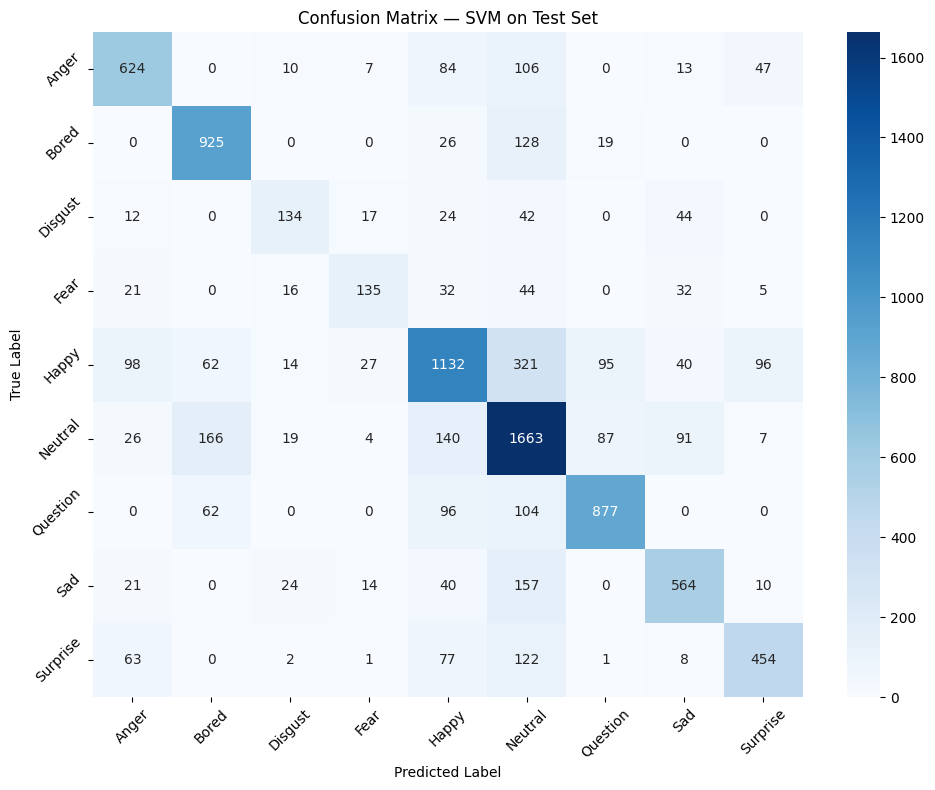

In [8]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Best estimator
best_svm = grid_search.best_estimator_

# Compute metrics
accuracy  = accuracy_score(Y_test, Y_test_pred)
precision = precision_score(Y_test, Y_test_pred, average='weighted')
recall    = recall_score(Y_test, Y_test_pred,    average='weighted')
f1        = f1_score(Y_test, Y_test_pred,        average='weighted')

# Print results
print(f"Final KNN Test Accuracy : {accuracy:.4f}")
print(f"Final KNN Test Precision: {precision:.4f}")
print(f"Final KNN Test Recall   : {recall:.4f}")
print(f"Final KNN Test F1‑Score : {f1:.4f}\n")

print("Final Classification Report:\n")
print(classification_report(Y_test, Y_test_pred))

conf_matrix = confusion_matrix(Y_test, Y_test_pred)
labels = best_svm.classes_

plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix — SVM on Test Set')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Conclusion

In this notebook, we successfully built and evaluated an SVM classifier for speech emotion recognition:
- Loaded and explored the data, checking for missing values and class imbalances.
- Preprocessed by selecting PC features and scaling with `StandardScaler` (critical for SVM).
- Trained a baseline SVM model to establish an initial benchmark.
- Tuned hyperparameters (`C`, `kernel`, `gamma`) via `GridSearchCV` with 5‑fold CV.
- Evaluated the tuned model on the test set, reporting accuracy, per‑class metrics, and a confusion matrix.